In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import Binarizer
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import datasets, linear_model

from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
#importing in the dataframe created previously
df= pd.read_csv('NY_bike_close.csv').dropna(axis=0)
df.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,tripduration,tmp,CensusTract,County_x,Borough,TotalPop,...,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11,borough_distance,distance_rank
0,6521,72.0,40.767272,-73.993929,3607,tmp,36061013500,New York,Manhattan,6384,...,0.0,5.7,40.767186,-73.995075,360610135002005,New York,NY,36061013500,0.097058,1.0
2,42233,82.0,40.711174,-74.000165,1214,tmp,36061002900,New York,Manhattan,6050,...,0.0,3.3,40.710653,-74.001407,360610029004022,New York,NY,36061002900,0.119646,1.0
3,56934,83.0,40.683826,-73.976323,1623,tmp,36047012901,Kings,Brooklyn,2577,...,0.0,5.7,40.683518,-73.976080,360470129011002,Kings,NY,36047012901,0.039960,1.0
4,78536,116.0,40.741776,-74.001497,5761,tmp,36061008300,New York,Manhattan,3929,...,0.0,11.3,40.742312,-74.001407,360610083001000,New York,NY,36061008300,0.060052,1.0
5,93334,119.0,40.696089,-73.978034,454,tmp,36047021100,Kings,Brooklyn,1362,...,0.0,9.2,40.697085,-73.979246,360470211001001,Kings,NY,36047021100,0.150738,1.0


In [3]:
df.dtypes

Unnamed: 0                   int64
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
tripduration                 int64
tmp                         object
CensusTract                  int64
County_x                    object
Borough                     object
TotalPop                     int64
Men                          int64
Women                        int64
Hispanic                   float64
White                      float64
Black                      float64
Native                     float64
Asian                      float64
Citizen                      int64
Income                     float64
IncomeErr                  float64
IncomePerCap               float64
IncomePerCapErr            float64
Poverty                    float64
ChildPoverty               float64
Professional               float64
Service                    float64
Office                     float64
Construction               float64
Production          

Text(0.5, 1.0, 'Ride Trip Duration')

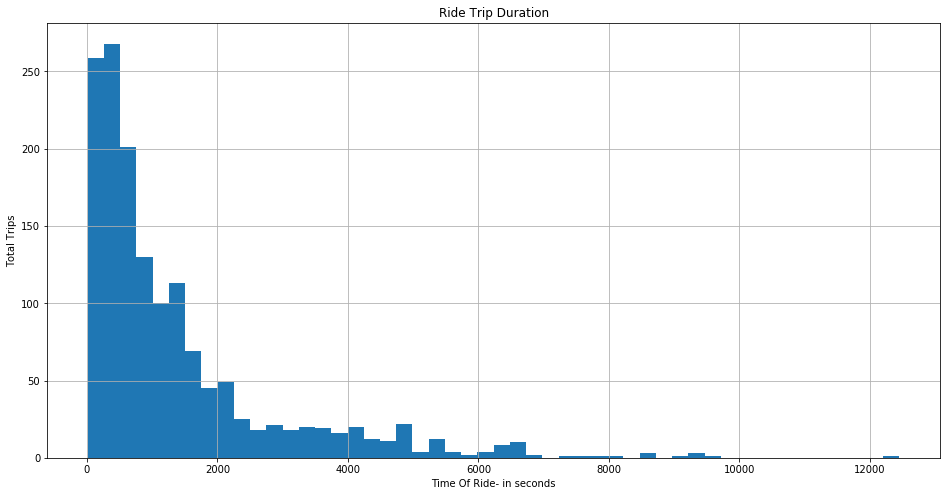

In [4]:
plt.figure(figsize=(16, 8))
df.tripduration.hist( bins=50)
plt.xlabel("Time Of Ride- in seconds")
plt.ylabel('Total Trips')
plt.title ('Ride Trip Duration')

In [5]:
# to normalize the data,I used the log function on the tripduration column
df['log_tripcount']=np.log(df.tripduration)

Text(0.5, 1.0, 'Log of Ride Trip Duration')

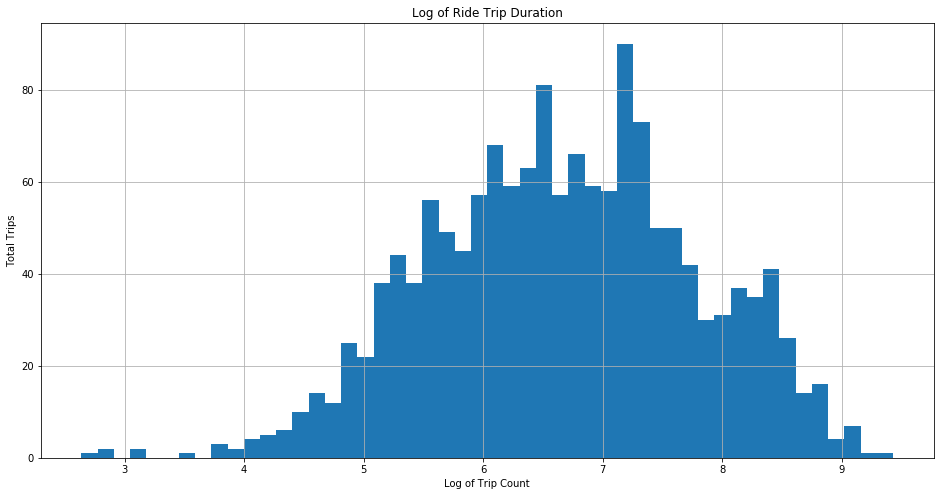

In [6]:
plt.figure(figsize=(16, 8))
df.log_tripcount.hist( bins=50)
plt.xlabel("Log of Trip Count")
plt.ylabel('Total Trips')
plt.title ('Log of Ride Trip Duration')

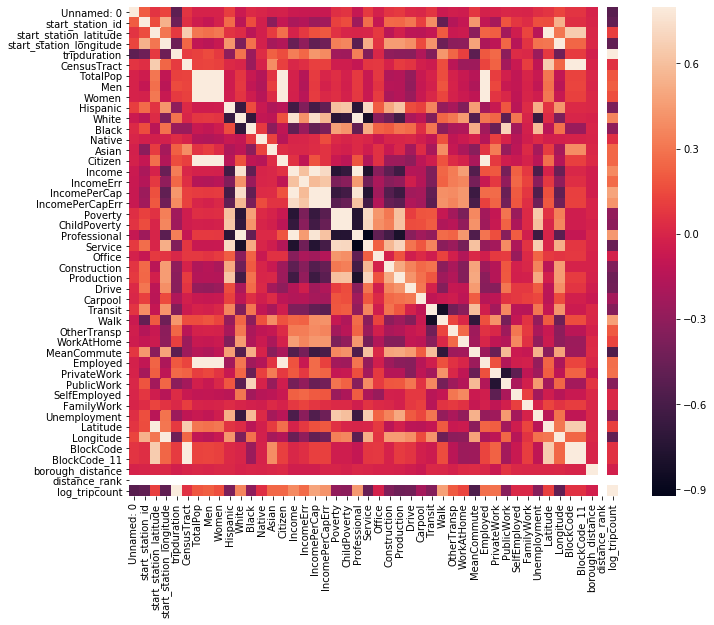

In [7]:
corrmat = df.corr()


f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [8]:
# Using the heat correlation map above selecting features 
x=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','MeanCommute','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork', 'tripduration',
     'CensusTract','Hispanic','White','Black','Native','Asian','Citizen','IncomePerCap','Professional','Service','Office',
     'Construction','Production','Latitude','Longitude','BlockCode','log_tripcount']].dropna(axis=0)

y=df['tripduration'].dropna

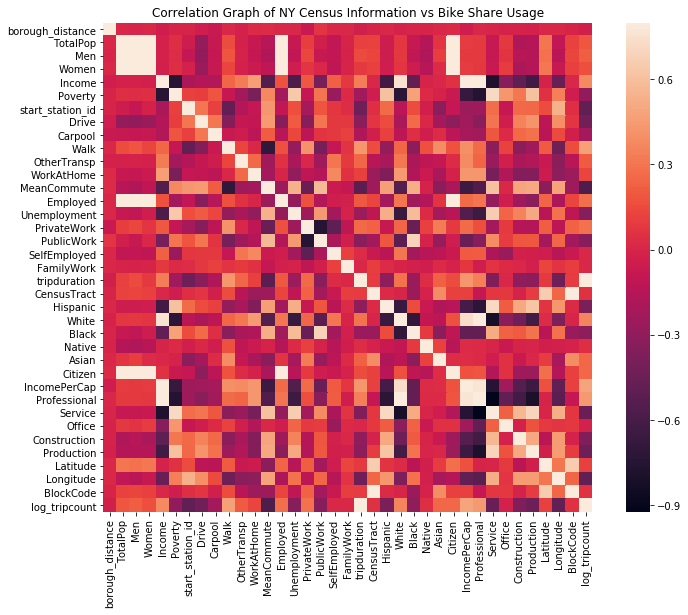

In [9]:
corrmat=x.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.title('Correlation Graph of NY Census Information vs Bike Share Usage')
plt.show()


In [10]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [11]:
corr = x.corr()

In [12]:
import statsmodels.api as sm

In [13]:
#Running the statsmodel to determine the p-values of the selected features. 
reg1 = sm.OLS(endog= x['tripduration'], exog=x[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','MeanCommute','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork', 'tripduration',
     'CensusTract','Hispanic','White','Black','Native','Asian','Citizen','IncomePerCap','Professional','Service','Office',
     'Construction','Production','Latitude','Longitude','BlockCode','log_tripcount']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

In [14]:
results = reg1.fit()
type(results)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.252e+12
Date:                Tue, 01 Oct 2019   Prob (F-statistic):               0.00
Time:                        13:24:41   Log-Likelihood:                 4490.6
No. Observations:                1495   AIC:                            -8939.
Df Residuals:                    1474   BIC:                            -8828.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
borough_distance  1.264e-06   3.15e-06  

In [15]:
# Defining the dataframe with 10 features that have a p-value of less than 0.05 to avoid overfitting.
df_p=df[['TotalPop','Women','Income','Poverty','start_station_id','Drive','WorkAtHome','MeanCommute',
     'Citizen','IncomePerCap']].dropna(axis=0)

In [16]:
df_p.columns

Index(['TotalPop', 'Women', 'Income', 'Poverty', 'start_station_id', 'Drive',
       'WorkAtHome', 'MeanCommute', 'Citizen', 'IncomePerCap'],
      dtype='object')

In [17]:
df.columns

Index(['Unnamed: 0', 'start_station_id', 'start_station_latitude',
       'start_station_longitude', 'tripduration', 'tmp', 'CensusTract',
       'County_x', 'Borough', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White',
       'Black', 'Native', 'Asian', 'Citizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Latitude', 'Longitude', 'BlockCode',
       'County_y', 'State', 'BlockCode_11', 'borough_distance',
       'distance_rank', 'log_tripcount'],
      dtype='object')

In [18]:
# Creating dummies (integers) for Borough and County_x columns so that they can be used in th models
df_clean=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Borough','County_x','Hispanic','Black',
            'Asian','White','Office','Construction','Production','Professional','Service']].dropna (axis=1)

df_X=pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])],axis=1 )




In [19]:
X = pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])], axis=1)

Y = df['log_tripcount']

In [20]:
df_X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Construction,Production,Professional,Service,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,1.1,4.3,57.5,13.2,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,9.9,4.1,32.3,30.4,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.0,0.7,61.5,17.5,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.9,0.7,56.8,10.4,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,3.8,11.5,44.3,22.7,1,0,0,1,0,0


In [21]:
df_X.columns

Index(['borough_distance', 'TotalPop', 'Men', 'Women', 'Income', 'Poverty',
       'start_station_id', 'Drive', 'Carpool', 'Walk', 'OtherTransp',
       'WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'Brooklyn', 'Manhattan', 'Queens', 'Kings',
       'New York', 'Queens'],
      dtype='object')

In [22]:
Y.head()
X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Construction,Production,Professional,Service,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,1.1,4.3,57.5,13.2,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,9.9,4.1,32.3,30.4,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.0,0.7,61.5,17.5,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.9,0.7,56.8,10.4,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,3.8,11.5,44.3,22.7,1,0,0,1,0,0


In [23]:
#Models below are first run through, no feature engineering yet. 

In [24]:
y=df.log_tripcount
X= df_X.drop ('Borough', 1).drop('County_x' , 1)
(X_train, X_test, y_train, y_test)=train_test_split(X,y,test_size=0.25)
lr=LinearRegression()

In [25]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

0.6504471099372925

R-squared regression: 0.4910456463578624
R-squared PLSR: 0.48806498687104904


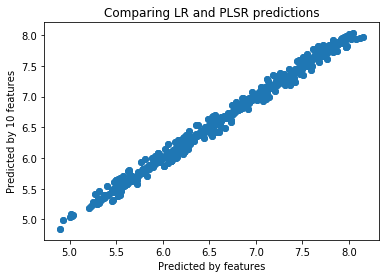

In [26]:
from sklearn.cross_decomposition import PLSRegression

regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression



In [28]:
regr1 = linear_model.LinearRegression()
Y_train = df['log_tripcount']
X_train = df_X.drop ('Borough', 1).drop('County_x' , 1)

regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))


R-squared simple model:
0.4910456463578624


In [29]:
df_X.head()

,borough_distance,TotalPop,Men,Women,Income,Poverty,start_station_id,Drive,Carpool,Walk,...,Construction,Production,Professional,Service,Brooklyn,Manhattan,Queens,Kings,New York,Queens
0,0.097058,6384,3286,3098,62290.0,18.6,72.0,6.9,1.1,39.5,...,1.1,4.3,57.5,13.2,0,1,0,0,1,0
2,0.119646,6050,3671,2379,30629.0,20.6,82.0,2.8,4.0,43.6,...,9.9,4.1,32.3,30.4,0,1,0,0,1,0
3,0.039960,2577,1102,1475,82071.0,11.2,83.0,1.2,0.0,8.7,...,0.0,0.7,61.5,17.5,1,0,0,1,0,0
4,0.060052,3929,1534,2395,69303.0,18.5,116.0,2.0,0.8,17.0,...,0.9,0.7,56.8,10.4,0,1,0,0,1,0
5,0.150738,1362,684,678,43000.0,18.7,119.0,25.8,2.3,4.7,...,3.8,11.5,44.3,22.7,1,0,0,1,0,0


In [30]:
df_X.columns

Index(['borough_distance', 'TotalPop', 'Men', 'Women', 'Income', 'Poverty',
       'start_station_id', 'Drive', 'Carpool', 'Walk', 'OtherTransp',
       'WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'Brooklyn', 'Manhattan', 'Queens', 'Kings',
       'New York', 'Queens'],
      dtype='object')

In [31]:
from sklearn import ensemble
regr = ensemble.RandomForestRegressor()
X = df_X.drop ('Borough', 1).drop('County_x' , 1)
Y = df['log_tripcount']
regr.fit(X, Y)

print(regr.feature_importances_)

[7.52669932e-02 5.74733141e-03 5.74385590e-03 8.01779199e-03
 3.15309659e-02 1.63215667e-02 1.30606345e-01 3.10008967e-02
 9.76762296e-03 2.24283477e-01 1.77314196e-02 1.32733781e-02
 1.22262272e-02 1.09421336e-02 1.52239729e-02 1.40895768e-02
 1.36839012e-02 1.61668154e-03 1.13478701e-02 4.19876168e-02
 2.41320536e-02 1.25412169e-02 7.43133230e-03 9.21404432e-03
 1.31071474e-02 4.78668788e-02 4.54119291e-02 3.71217592e-04
 1.96960888e-03 2.47354829e-05 3.89251616e-03 1.43452836e-01
 1.74859191e-04]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
#The random forest regressor is showing the most important features within the the df_X dataframe

In [33]:
# Feature engineering 

In [34]:
y=df.log_tripcount
X_feat=df_X.drop ('Borough', 1).drop('County_x' , 1)

X_feat['male_usage']= X.Men / X.TotalPop *100
X_feat['shared_trans'] = X.Carpool + X.Walk + X.OtherTransp
X_feat['minority'] = X.Hispanic + X.Black + X.Asian
X_feat['corporate'] = X.Office +X.Construction + X.PublicWork + X.Production
(X_train, X_test, y_train, y_test)=train_test_split(X_feat,y,test_size=0.25)
lr=LinearRegression()


In [35]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr.score(X_test,y_pred)
mean_squared_error(y_test,y_pred)

0.6607169777506211

R-squared regression: 0.4910456463578624
R-squared PLSR: 0.48806498687104904


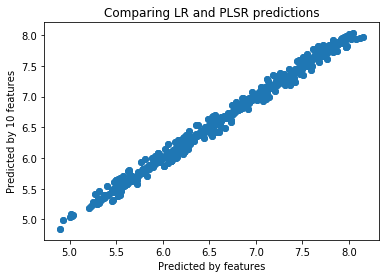

In [36]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [37]:
y_gb = df['log_tripcount'] - 1
X_gb = df_X.loc[:,:]

# Make the categorical variable 'country' into dummies.
X_gb = df_X.drop ('Borough', 1).drop('County_x' , 1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)



In [38]:
params = {'n_estimators': 500,
          'max_depth': 2}


clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 0.7824


In [39]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train, y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_predicted))

R2 sq:  0.6753638270354805
Mean squared error: 0.68
Test Variance score: 0.44


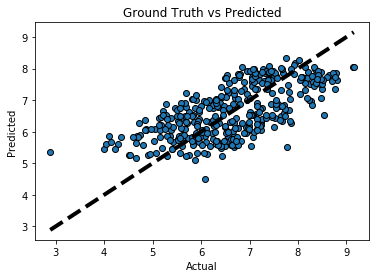

In [41]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

Showing that for higher value data there is a stronger fit then those with lower value has a looser fit amongst the linear line. 

Text(0, 0.5, 'Deviance')

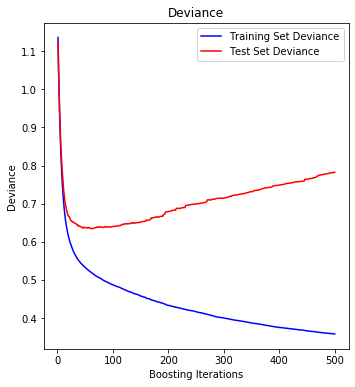

In [42]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

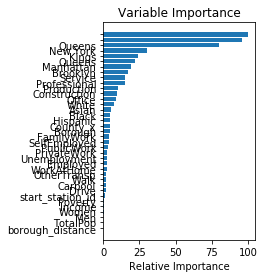

In [43]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,df_X)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

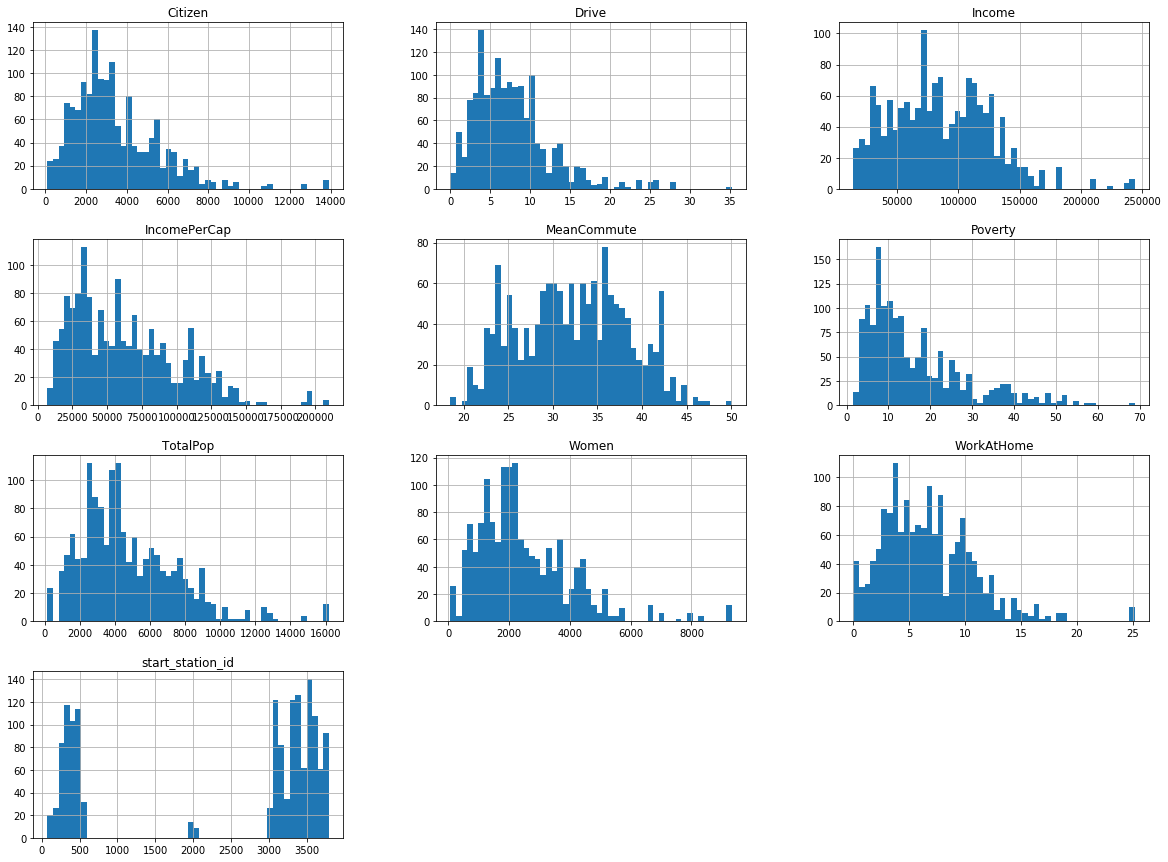

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
df_p.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [45]:
# Models run with df_p for X have features with a p-value less than 0.05

In [46]:
# Define X and y
y=df.log_tripcount
X= df_p
(X_train, X_test, y_train, y_test)=train_test_split(X,y,test_size=0.25)
lr=LinearRegression()

In [47]:
df_p.columns

Index(['TotalPop', 'Women', 'Income', 'Poverty', 'start_station_id', 'Drive',
       'WorkAtHome', 'MeanCommute', 'Citizen', 'IncomePerCap'],
      dtype='object')

In [48]:
# Linear Regression model
lr.fit(X_train,y_train)
y_lr_pred=lr.predict(X_test)
lr.score(X_test,y_lr_pred)
mean_squared_error(y_test,y_lr_pred)

0.705723335525443

R-squared regression: 0.46817270419122187
R-squared PLSR: 0.46817270419122187


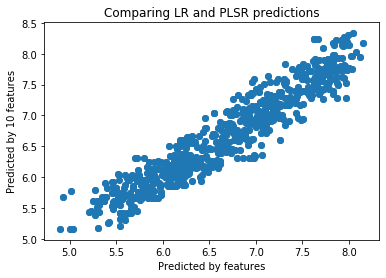

In [49]:
# R-squared Linear Regression and Partial Least Square Regression
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_lr_pred = regr.predict(X_test)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

The model shows that the data is fit pretty well along the line with a few outliers in the lower values. 

In [50]:
regr1 = linear_model.LinearRegression()
Y_train = df['log_tripcount']
X_train = df_p

regr1.fit(X_train, Y_train)
print('\nR-squared simple model:')
print(regr1.score(X_train, Y_train))


R-squared simple model:
0.46817270419122187


In [51]:
# Random Forest Regression
regr = ensemble.RandomForestRegressor()
X = df_p
Y = df['log_tripcount']
regr.fit(X, Y)

print(regr.feature_importances_)

[0.02307768 0.02513276 0.03428225 0.03143228 0.22712648 0.06503543
 0.04322482 0.41363699 0.02903609 0.10801522]


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
#Gradient Boost Variable definition
y_gb2 = df['log_tripcount'] - 1
X_gb2 = df_p.loc[:,:]


X_gb2 = df_p

# Create training and test sets.
offset = int(X.shape[0] * 0.9)



In [53]:
# Mean Squared Error of Gradient Boost
params = {'n_estimators': 500,
          'max_depth': 2}


clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, Y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)


MSE: 0.4855


In [54]:
#Gradient Boost Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [55]:
model_score = model.score(X_train, Y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_gradient_pred = model.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_gradient_pred))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test, y_gradient_pred))

R2 sq:  0.616899545603221
Mean squared error: 0.50
Test Variance score: 0.62


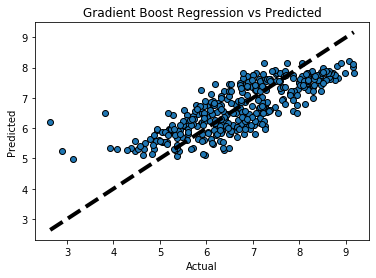

In [56]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_gradient_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Gradient Boost Regression vs Predicted")
plt.show()

Text(0, 0.5, 'Deviance')

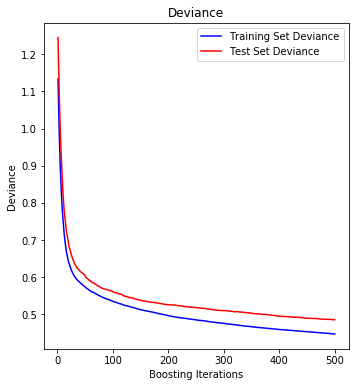

In [57]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

R-squared regression: 0.46817270419122187
R-squared PLSR: 0.46817270419122187


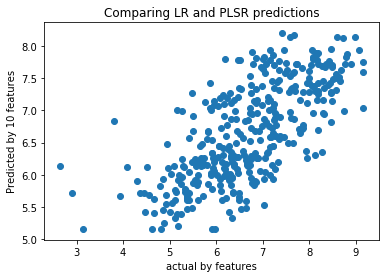

In [58]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_lr_pred = regr.predict(X_test)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(X_test)
print('R-squared PLSR:', pls1.score(X, y))


plt.scatter(y_test,Y_lr_pred) 
plt.xlabel('actual by features')
plt.ylabel('Predicted by 10 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

In [59]:
lr.fit(X_train,Y_train)
y_lr_pred=lr.predict(X_test)
lr.score(X_test,y_lr_pred)
mean_squared_error(y_test,y_lr_pred)

0.6887318628779904

In [60]:
data_ny=pd.read_csv('nyc_census_tracts.csv',keep_default_na=False, na_values=[""])
data_ny.head()

,CensusTract,County,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,36005000200,Bronx,Bronx,5403,2659,2744,75.8,2.3,16.0,0.0,...,2.9,0.0,0.0,43.0,2308,80.8,16.2,2.9,0.0,7.7
2,36005000400,Bronx,Bronx,5915,2896,3019,62.7,3.6,30.7,0.0,...,1.4,0.5,2.1,45.0,2675,71.7,25.3,2.5,0.6,9.5
3,36005001600,Bronx,Bronx,5879,2558,3321,65.1,1.6,32.4,0.0,...,8.6,1.6,1.7,38.8,2120,75.0,21.3,3.8,0.0,8.7
4,36005001900,Bronx,Bronx,2591,1206,1385,55.4,9.0,29.0,0.0,...,3.0,2.4,6.2,45.4,1083,76.8,15.5,7.7,0.0,19.2


In [61]:
data_census=pd.read_csv('census_block_loc.csv',keep_default_na=False, na_values=[""])
data_census.head()

,Latitude,Longitude,BlockCode,County,State
0,40.48,-74.280000,340230076002012,Middlesex,NJ
1,40.48,-74.276834,340230076005000,Middlesex,NJ
2,40.48,-74.273668,340230076003018,Middlesex,NJ
3,40.48,-74.270503,340230076003004,Middlesex,NJ
4,40.48,-74.267337,340230074021000,Middlesex,NJ


In [62]:
data_census['BlockCode_11'] = data_census['BlockCode'].apply(lambda x: int(str(x)[0:11]))

In [63]:
df_census= pd.merge(left=data_ny,right= data_census, how='inner', on=None, left_on='CensusTract', right_on='BlockCode_11',
        left_index=False, right_index=False, sort=True,
        suffixes=('_x', '_y'), copy=True, indicator=False,
        validate=None)
df_census.head()

,CensusTract,County_x,Borough,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Latitude,Longitude,BlockCode,County_y,State,BlockCode_11
0,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.887437,360050001001007,Bronx,NY,36005000100
1,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.884271,360050001001005,Bronx,NY,36005000100
2,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.881106,360050001001003,Bronx,NY,36005000100
3,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.877940,360050001001003,Bronx,NY,36005000100
4,36005000100,Bronx,Bronx,7703,7133,570,29.9,6.1,60.9,0.2,...,NaN,NaN,NaN,NaN,40.787538,-73.874774,360050001001006,Bronx,NY,36005000100


In [64]:
df_clean=df[['borough_distance','TotalPop','Men','Women','Income','Poverty','start_station_id','Drive','Carpool','Walk','OtherTransp',
     'WorkAtHome','Employed','Unemployment','PrivateWork','PublicWork','SelfEmployed','FamilyWork','Borough','County_x','Hispanic','Black',
            'Asian','White','Office','Construction','Production','Professional','Service','log_tripcount']].dropna (axis=1)

df_X=pd.concat([df_clean, pd.get_dummies(df_clean['Borough']),pd.get_dummies(df_clean['County_x'])],axis=1 )




In [65]:
df_X.columns

Index(['borough_distance', 'TotalPop', 'Men', 'Women', 'Income', 'Poverty',
       'start_station_id', 'Drive', 'Carpool', 'Walk', 'OtherTransp',
       'WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'log_tripcount', 'Brooklyn', 'Manhattan',
       'Queens', 'Kings', 'New York', 'Queens'],
      dtype='object')

In [66]:
X = df_X

Y = df_X['log_tripcount']

In [67]:
Y_train = df_X['log_tripcount']
X_train = df_X.drop ('Borough', 1).drop('County_x' , 1)

In [68]:
Y =df_X.log_tripcount
X= df_X.drop ('Borough', 1).drop('County_x' , 1).drop('log_tripcount' , 1)
(X_train, X_test, Y_train, Y_test)=train_test_split(X,Y,test_size=0.25)
lr=LinearRegression()

In [69]:
df_X.columns

Index(['borough_distance', 'TotalPop', 'Men', 'Women', 'Income', 'Poverty',
       'start_station_id', 'Drive', 'Carpool', 'Walk', 'OtherTransp',
       'WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'log_tripcount', 'Brooklyn', 'Manhattan',
       'Queens', 'Kings', 'New York', 'Queens'],
      dtype='object')

In [70]:
df_predict= df_census[['TotalPop', 'Men', 'Women', 'Income', 'Poverty','Drive', 'Carpool', 'Walk', 'OtherTransp','WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic','Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service']].dropna(axis=0)

In [71]:
df_census.columns

Index(['CensusTract', 'County_x', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Latitude', 'Longitude',
       'BlockCode', 'County_y', 'State', 'BlockCode_11'],
      dtype='object')

In [72]:
df_predict.columns

Index(['TotalPop', 'Men', 'Women', 'Income', 'Poverty', 'Drive', 'Carpool',
       'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'Unemployment',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Borough',
       'County_x', 'Hispanic', 'Black', 'Asian', 'White', 'Office',
       'Construction', 'Production', 'Professional', 'Service'],
      dtype='object')

In [73]:
#Getting the dummies for the census information to run the prediction models for the Borough and County_x
df_p2=pd.concat([df_predict, pd.get_dummies(df_predict['Borough']),pd.get_dummies(df_predict['County_x'])],axis=1 )



In [74]:
df_p2.columns

Index(['TotalPop', 'Men', 'Women', 'Income', 'Poverty', 'Drive', 'Carpool',
       'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'Unemployment',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Borough',
       'County_x', 'Hispanic', 'Black', 'Asian', 'White', 'Office',
       'Construction', 'Production', 'Professional', 'Service', 'Bronx',
       'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx', 'Kings',
       'New York', 'Queens', 'Richmond'],
      dtype='object')

In [75]:
df_p2.dtypes

TotalPop           int64
Men                int64
Women              int64
Income           float64
Poverty          float64
Drive            float64
Carpool          float64
Walk             float64
OtherTransp      float64
WorkAtHome       float64
Employed           int64
Unemployment     float64
PrivateWork      float64
PublicWork       float64
SelfEmployed     float64
FamilyWork       float64
Borough           object
County_x          object
Hispanic         float64
Black            float64
Asian            float64
White            float64
Office           float64
Construction     float64
Production       float64
Professional     float64
Service          float64
Bronx              uint8
Brooklyn           uint8
Manhattan          uint8
Queens             uint8
Staten Island      uint8
Bronx              uint8
Kings              uint8
New York           uint8
Queens             uint8
Richmond           uint8
dtype: object

In [76]:
df_p2.head()

,TotalPop,Men,Women,Income,Poverty,Drive,Carpool,Walk,OtherTransp,WorkAtHome,...,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Bronx,Kings,New York,Queens,Richmond
39,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
40,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
41,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
42,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
43,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0


In [77]:
#dropping the columns Borough, County_x because we now have the dummy columns for them, and dropping 
#Staten Island, Richmond as there are no bike share stations there. 
df_p2= df_p2.drop ('Borough', 1).drop('County_x' , 1).drop('Staten Island',1).drop("Richmond",1)

In [78]:
lr.fit(X_train,Y_train)
y_lr_pred=lr.predict(df_p2)
lr.score(df_p2,y_lr_pred)
print (y_lr_pred)
print(y_lr_pred.shape)

[-8911.41977005 -8911.41977005 -8911.41977005 ... -1882.82818446
 -1882.82818446 -1882.82818446]
(11947,)


Text(0.5, 1.0, 'Linear Regression')

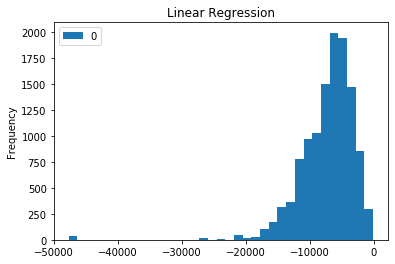

In [79]:
plt.figure
pd.DataFrame(y_lr_pred).plot(kind="hist", bins=35)
plt.xlabel
plt. title ('Linear Regression')

R-squared regression: 0.4910456463578624
R-squared PLSR: 0.48806498687104904


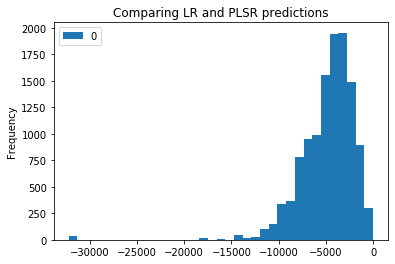

In [80]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

Y_lr_pred = regr.predict(df_p2)
print('R-squared regression:', regr.score(X, y))


pls1 = PLSRegression(n_components=10)


pls1.fit(X, y)


Y_PLS_pred = pls1.predict(df_p2)
print('R-squared PLSR:', pls1.score(X, y))


pd.DataFrame(Y_PLS_pred).plot(kind="hist", bins=35)
plt.xlabel
plt.ylabel
plt.title('Comparing LR and PLSR predictions')
plt.show()

Shows a 49% accuracy in the prediction of the next station. 

In [81]:
df_p10= df_census[['TotalPop', 'Women', 'Income', 'Poverty', 'Employed', 'Drive',
       'WorkAtHome', 'MeanCommute', 'Citizen', 'IncomePerCap']].dropna(axis=0)

In [82]:
#Gradient Boost Regression
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [83]:
#Using gradient boost regression to predict the next station
y_gradient_pred = model.predict(df_p2)


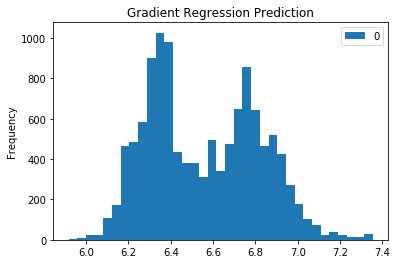

In [84]:

pd.DataFrame(y_gradient_pred).plot(kind="hist", bins=35)
plt.title('Gradient Regression Prediction')
plt.show()

E raised to 6th or 7.5 rides/ month the tail shows the potential for growth because there aren't as many stations out there. 

In [85]:
df_p2.columns

Index(['TotalPop', 'Men', 'Women', 'Income', 'Poverty', 'Drive', 'Carpool',
       'Walk', 'OtherTransp', 'WorkAtHome', 'Employed', 'Unemployment',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Hispanic',
       'Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens',
       'Bronx', 'Kings', 'New York', 'Queens'],
      dtype='object')

In [86]:
df_census.columns

Index(['CensusTract', 'County_x', 'Borough', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'Latitude', 'Longitude',
       'BlockCode', 'County_y', 'State', 'BlockCode_11'],
      dtype='object')

In [87]:
df_censusna= df_census[['TotalPop', 'Men', 'Women', 'Income', 'Poverty','Drive', 'Carpool', 'Walk', 'OtherTransp','WorkAtHome', 'Employed', 'Unemployment', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Borough', 'County_x', 'Hispanic','Black', 'Asian', 'White', 'Office', 'Construction', 'Production',
       'Professional', 'Service', 'CensusTract','Latitude', 'Longitude']].dropna(axis=0)

In [88]:
print(df_censusna.shape)

(11947, 30)


In [89]:
print(df_p2.shape)

(11947, 33)


In [90]:
#adding the new prediction column to the census data frame so that we can now match up 
# the prediction with the appropriate latitude/longitude and Borough name. 
df_censusna=pd.concat([df_censusna,pd.Series(y_gradient_pred,index=df_p2.index)],axis=1)

In [91]:
df_censusna.head()

,TotalPop,Men,Women,Income,Poverty,Drive,Carpool,Walk,OtherTransp,WorkAtHome,...,White,Office,Construction,Production,Professional,Service,CensusTract,Latitude,Longitude,0
39,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,2.3,23.9,8.0,22.3,28.7,17.1,36005000200,40.798844,-73.862111,6.597926
40,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,2.3,23.9,8.0,22.3,28.7,17.1,36005000200,40.798844,-73.858945,6.597926
41,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,2.3,23.9,8.0,22.3,28.7,17.1,36005000200,40.801106,-73.862111,6.597926
42,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,2.3,23.9,8.0,22.3,28.7,17.1,36005000200,40.801106,-73.858945,6.597926
43,5403,2659,2744,72034.0,20.0,44.8,13.7,2.9,0.0,0.0,...,2.3,23.9,8.0,22.3,28.7,17.1,36005000200,40.801106,-73.855779,6.597926


In [92]:
df_censusna.columns

Index([    'TotalPop',          'Men',        'Women',       'Income',
            'Poverty',        'Drive',      'Carpool',         'Walk',
        'OtherTransp',   'WorkAtHome',     'Employed', 'Unemployment',
        'PrivateWork',   'PublicWork', 'SelfEmployed',   'FamilyWork',
            'Borough',     'County_x',     'Hispanic',        'Black',
              'Asian',        'White',       'Office', 'Construction',
         'Production', 'Professional',      'Service',  'CensusTract',
           'Latitude',    'Longitude',              0],
      dtype='object')

In [93]:
#creating a new data frame that shows the predictions only 7.25 and higher, which will show only 
# the areas where the next most profitable stations will be. 
new_station=df_censusna[df_censusna[0]>= 7.25]
new_station.head(20)

,TotalPop,Men,Women,Income,Poverty,Drive,Carpool,Walk,OtherTransp,WorkAtHome,...,White,Office,Construction,Production,Professional,Service,CensusTract,Latitude,Longitude,0
7781,2272,1021,1251,59493.0,8.8,38.1,0.9,0.0,2.6,0.0,...,0.0,41.0,8.0,4.4,24.1,22.4,36081018401,40.674472,-73.792462,7.301032
7782,2272,1021,1251,59493.0,8.8,38.1,0.9,0.0,2.6,0.0,...,0.0,41.0,8.0,4.4,24.1,22.4,36081018401,40.674472,-73.789296,7.301032
7783,2272,1021,1251,59493.0,8.8,38.1,0.9,0.0,2.6,0.0,...,0.0,41.0,8.0,4.4,24.1,22.4,36081018401,40.676734,-73.792462,7.301032
8009,2818,1272,1546,37857.0,35.4,38.5,5.3,4.3,2.8,3.8,...,0.0,30.5,4.1,16.5,14.7,34.2,36081026000,40.690302,-73.795628,7.261332
8010,2818,1272,1546,37857.0,35.4,38.5,5.3,4.3,2.8,3.8,...,0.0,30.5,4.1,16.5,14.7,34.2,36081026000,40.692563,-73.795628,7.261332
8011,2818,1272,1546,37857.0,35.4,38.5,5.3,4.3,2.8,3.8,...,0.0,30.5,4.1,16.5,14.7,34.2,36081026000,40.692563,-73.792462,7.261332
8015,1208,508,700,64464.0,20.4,35.2,5.3,2.8,0.0,0.0,...,0.0,26.6,7.3,9.1,23.8,33.3,36081026200,40.690302,-73.792462,7.321684
8016,1208,508,700,64464.0,20.4,35.2,5.3,2.8,0.0,0.0,...,0.0,26.6,7.3,9.1,23.8,33.3,36081026200,40.692563,-73.789296,7.321684
8024,1933,976,957,27833.0,24.9,35.0,3.5,0.0,2.0,5.0,...,0.0,32.0,8.1,11.5,13.7,34.8,36081026600,40.690302,-73.782965,7.266028
8025,1933,976,957,27833.0,24.9,35.0,3.5,0.0,2.0,5.0,...,0.0,32.0,8.1,11.5,13.7,34.8,36081026600,40.690302,-73.779799,7.266028


In [94]:
new_station.columns

Index([    'TotalPop',          'Men',        'Women',       'Income',
            'Poverty',        'Drive',      'Carpool',         'Walk',
        'OtherTransp',   'WorkAtHome',     'Employed', 'Unemployment',
        'PrivateWork',   'PublicWork', 'SelfEmployed',   'FamilyWork',
            'Borough',     'County_x',     'Hispanic',        'Black',
              'Asian',        'White',       'Office', 'Construction',
         'Production', 'Professional',      'Service',  'CensusTract',
           'Latitude',    'Longitude',              0],
      dtype='object')

In [95]:
#create a new csv so it is easier to call the dataframe up. 
new_station.to_csv('new_station.csv')

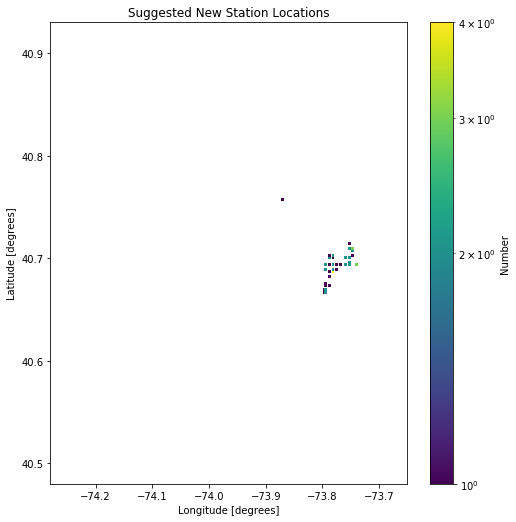

In [99]:
latmin = 40.48
lonmin = -74.28
latmax = 40.93
lonmax = -73.65
ratio = np.cos(40.7 * np.pi/180) * (lonmax-lonmin) /(latmax-latmin)
from matplotlib.colors import LogNorm
fig = plt.figure(1, figsize=(8,ratio*8) )
hist = plt.hist2d(new_station.Longitude,new_station.Latitude,bins=199,range=[[lonmin,lonmax],[latmin,latmax]],norm=LogNorm())
plt.xlabel('Longitude [degrees]')
plt.ylabel('Latitude [degrees]')
plt.title('Suggested New Station Locations')
plt.colorbar(label='Number')
plt.show()

Map shows the newest stations should be in Queens. The yellow dots show where the first stations should be added. 

In [97]:
new_station.Borough.hist

<bound method hist_series of 7781    Queens
7782    Queens
7783    Queens
8009    Queens
8010    Queens
8011    Queens
8015    Queens
8016    Queens
8024    Queens
8025    Queens
8026    Queens
8045    Queens
8046    Queens
8056    Queens
8057    Queens
8062    Queens
8063    Queens
8401    Queens
8574    Queens
8575    Queens
8576    Queens
8577    Queens
8588    Queens
8589    Queens
8590    Queens
8591    Queens
8592    Queens
8593    Queens
8807    Queens
8808    Queens
8809    Queens
8810    Queens
8811    Queens
8823    Queens
8824    Queens
8831    Queens
8832    Queens
8842    Queens
8843    Queens
8844    Queens
8845    Queens
8846    Queens
8847    Queens
8868    Queens
8869    Queens
8870    Queens
8871    Queens
9099    Queens
9100    Queens
9101    Queens
9867    Queens
9868    Queens
9869    Queens
9870    Queens
9871    Queens
9872    Queens
Name: Borough, dtype: object>

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


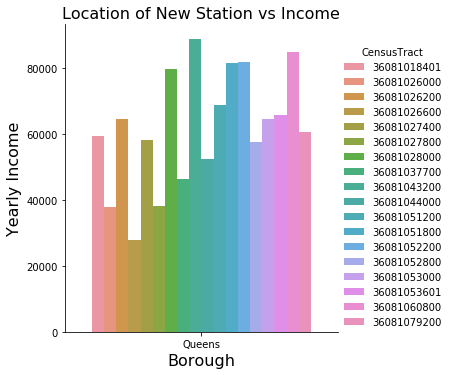

In [98]:
sns.catplot(x='Borough',y='Income',hue='CensusTract',kind='bar', data=new_station)

plt.xlabel('Borough', fontsize=16)
plt.ylabel('Yearly Income', fontsize=16)
plt.title('Location of New Station vs Income', fontsize=16)
plt.show()

This bar graph shows that within the different census tracts/ areas of Queen the income levels vary. For those that average $50,000-60,000/year would find the bike share stations probably most helpful as it would save them money on subway passes and the ability to ride into the city without having to find a place to keep their bike locked during the day. 